# Importing Libraries


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


## Business-1

# Loading Data

In [3]:
df = pd.read_csv("/content/Business_1.csv")

## Aggregate Features Per User for Clustering

In [4]:
absa_pivot = df.pivot_table(index='user_id',
                            columns=['aspect', 'sentiment_score'],
                            aggfunc='size',
                            fill_value=0)
absa_pivot.columns = [f"{a}_sent{s}" for a, s in absa_pivot.columns]
absa_pivot.reset_index(inplace=True)


nrc_cols = [col for col in df.columns if col.startswith("nrc_")]
nrc_agg = df.groupby('user_id')[nrc_cols].mean().reset_index()


user_features = pd.merge(absa_pivot, nrc_agg, on="user_id")



## Prepare Data for PCA

In [5]:
X = user_features.drop(columns=['user_id'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA for Dimensionality Reduction

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## Perform Clustering (KMeans) on Reduced Data

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)
user_features['cluster'] = clusters

## Evaluation

Silhouette Score: 0.4826


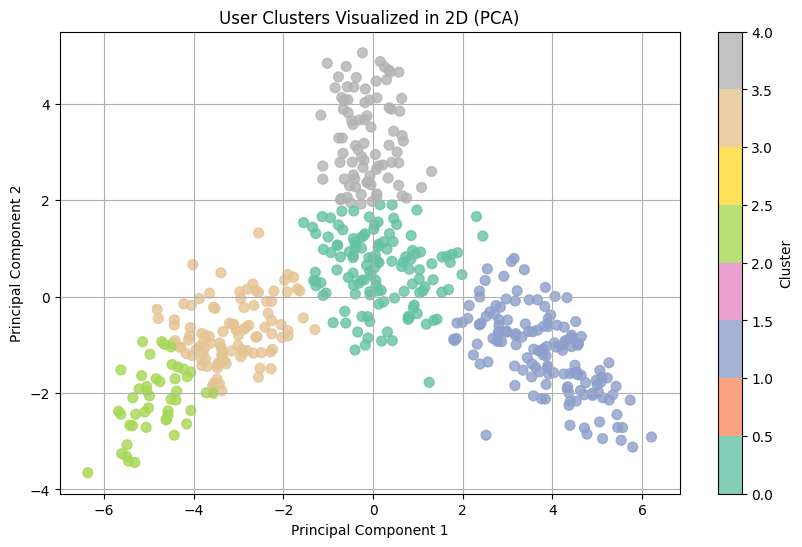

In [8]:
sil_score = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set2', alpha=0.8, s=50)
plt.title('User Clusters Visualized in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


## Checking the distribution

### by calculating emotion score

In [131]:
df = pd.read_csv("Business_1.csv")

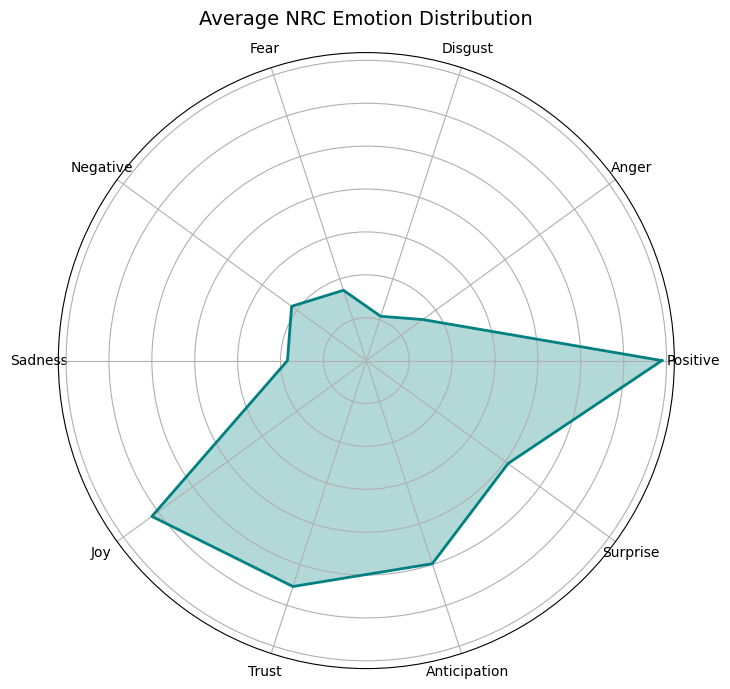

In [132]:
nrc_emotions = [
    'nrc_positive', 'nrc_anger', 'nrc_disgust', 'nrc_fear',
    'nrc_negative', 'nrc_sadness', 'nrc_joy', 'nrc_trust',
    'nrc_anticipation', 'nrc_surprise'
]

avg_emotions = df[nrc_emotions].mean()
values = avg_emotions.values.tolist()
values += values[:1]


labels = [e.replace("nrc_", "").capitalize() for e in nrc_emotions]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='teal', linewidth=2)
ax.fill(angles, values, color='teal', alpha=0.3)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.set_title("Average NRC Emotion Distribution", size=14, pad=20)

plt.show()

## Insight
#### Users express strong positive emotions, especially joy, trust, and anticipation.
#### Negative emotions like anger, fear, and disgust are minimal.

## Business-2

In [89]:
df = pd.read_csv("/content/Business_2.csv")

In [90]:
absa_pivot = df.pivot_table(index='user_id',
                            columns=['aspect', 'sentiment'],
                            aggfunc='size',
                            fill_value=0)
absa_pivot.columns = [f"{a}_sent{s}" for a, s in absa_pivot.columns]
absa_pivot.reset_index(inplace=True)


nrc_cols = [col for col in df.columns if col.startswith("nrc_")]
nrc_agg = df.groupby('user_id')[nrc_cols].mean().reset_index()


user_features = pd.merge(absa_pivot, nrc_agg, on="user_id")



In [91]:
X = user_features.drop(columns=['user_id'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [93]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)
user_features['cluster'] = clusters

Silhouette Score: 0.4513


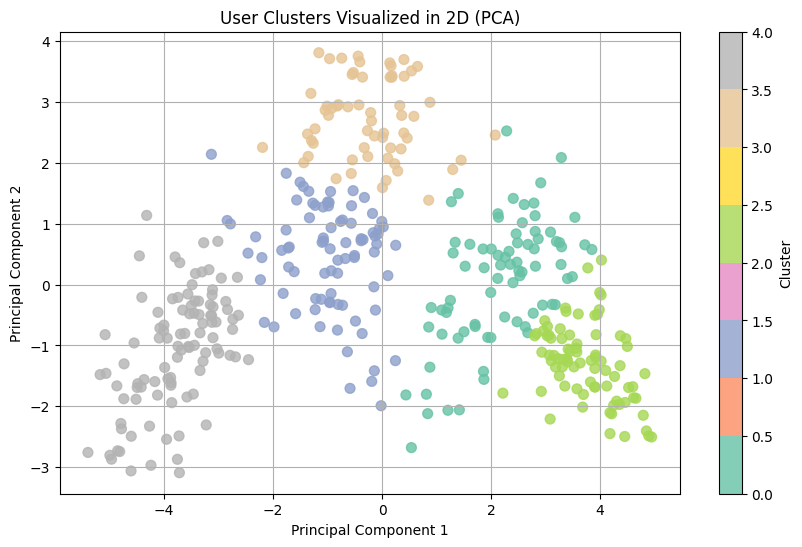

In [94]:
sil_score = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set2', alpha=0.8, s=50)
plt.title('User Clusters Visualized in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


## Checking the distribution

In [143]:
df = pd.read_csv("/content/Business_2.csv")

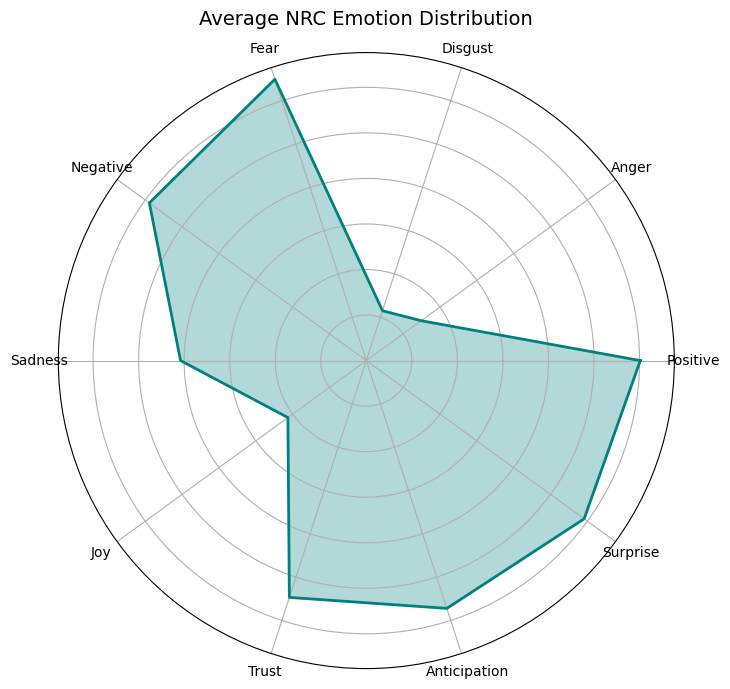

In [145]:
nrc_emotions = ['nrc_positive', 'nrc_anger', 'nrc_disgust', 'nrc_fear',
                'nrc_negative', 'nrc_sadness', 'nrc_joy', 'nrc_trust',
                'nrc_anticipation', 'nrc_surprise']

avg_emotions = df[nrc_emotions].mean()
values = avg_emotions.values.tolist()
values += values[:1]


labels = [e.replace("nrc_", "").capitalize() for e in nrc_emotions]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='teal', linewidth=2)
ax.fill(angles, values, color='teal', alpha=0.3)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.set_title("Average NRC Emotion Distribution", size=14, pad=20)

plt.show()

## Insigths
#### Fear unexpectedly dominates the emotional landscape, indicating possible concern or uncertainty in reviews.

#### Joy is surprisingly low, suggesting positive sentiment may be more cautious or reserved.

## Business-3

In [96]:
df = pd.read_csv("/content/Business_3.csv")

In [97]:
absa_pivot = df.pivot_table(index='user_id',
                            columns=['aspect', 'sentiment'],
                            aggfunc='size',
                            fill_value=0)
absa_pivot.columns = [f"{a}_sent{s}" for a, s in absa_pivot.columns]
absa_pivot.reset_index(inplace=True)


nrc_cols = [col for col in df.columns if col.startswith("nrc_")]
nrc_agg = df.groupby('user_id')[nrc_cols].mean().reset_index()


user_features = pd.merge(absa_pivot, nrc_agg, on="user_id")

In [98]:
X = user_features.drop(columns=['user_id'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [99]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [100]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)
user_features['cluster'] = clusters

Silhouette Score: 0.4479


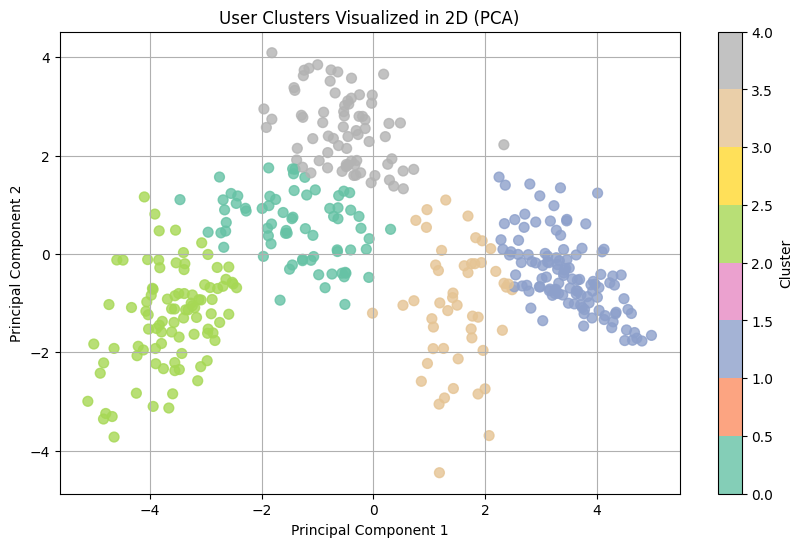

In [101]:
sil_score = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set2', alpha=0.8, s=50)
plt.title('User Clusters Visualized in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


## Checking the distribution

In [149]:
df = pd.read_csv("/content/Business_3.csv")

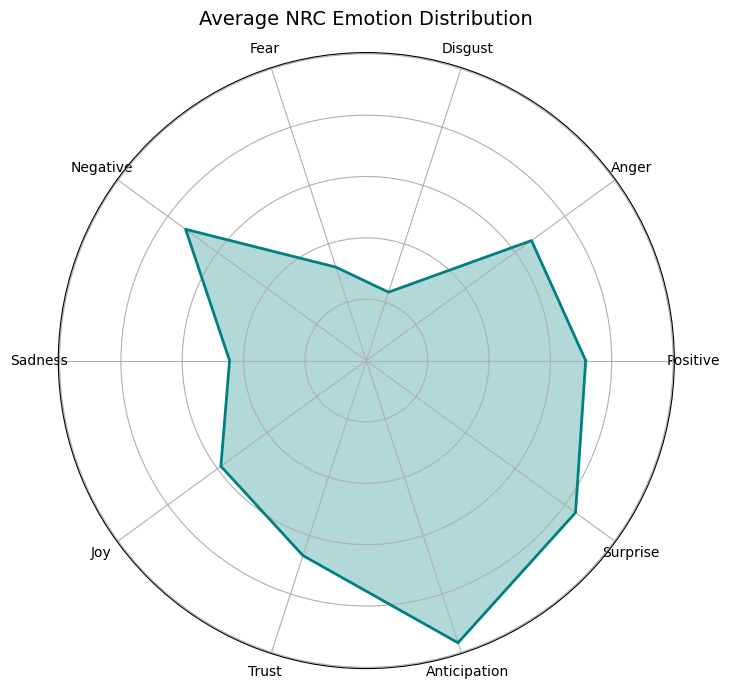

In [150]:
nrc_emotions = ['nrc_positive', 'nrc_anger', 'nrc_disgust', 'nrc_fear',
                'nrc_negative', 'nrc_sadness', 'nrc_joy', 'nrc_trust',
                'nrc_anticipation', 'nrc_surprise']

avg_emotions = df[nrc_emotions].mean()
values = avg_emotions.values.tolist()
values += values[:1]


labels = [e.replace("nrc_", "").capitalize() for e in nrc_emotions]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='teal', linewidth=2)
ax.fill(angles, values, color='teal', alpha=0.3)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.set_title("Average NRC Emotion Distribution", size=14, pad=20)

plt.show()

## Insights
#### Anticipation and surprise are the leading emotions, suggesting users are often curious or unexpectedly affected by their experiences.

#### Positive and negative emotions are fairly balanced, pointing to mixed overall sentiment.

#### Disgust and fear remain minimal, indicating fewer extremely negative reactions.

# Cafe

In [82]:
df = pd.read_csv("/content/cafe_reviews.csv")

In [83]:
absa_pivot = df.pivot_table(index='user_id',
                            columns=['aspect', 'sentiment'],
                            aggfunc='size',
                            fill_value=0)
absa_pivot.columns = [f"{a}_sent{s}" for a, s in absa_pivot.columns]
absa_pivot.reset_index(inplace=True)


nrc_cols = [col for col in df.columns if col.startswith("nrc_")]
nrc_agg = df.groupby('user_id')[nrc_cols].mean().reset_index()


user_features = pd.merge(absa_pivot, nrc_agg, on="user_id")

In [85]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [86]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)
user_features['cluster'] = clusters

In [84]:
X = user_features.drop(columns=['user_id'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Silhouette Score: 0.4710


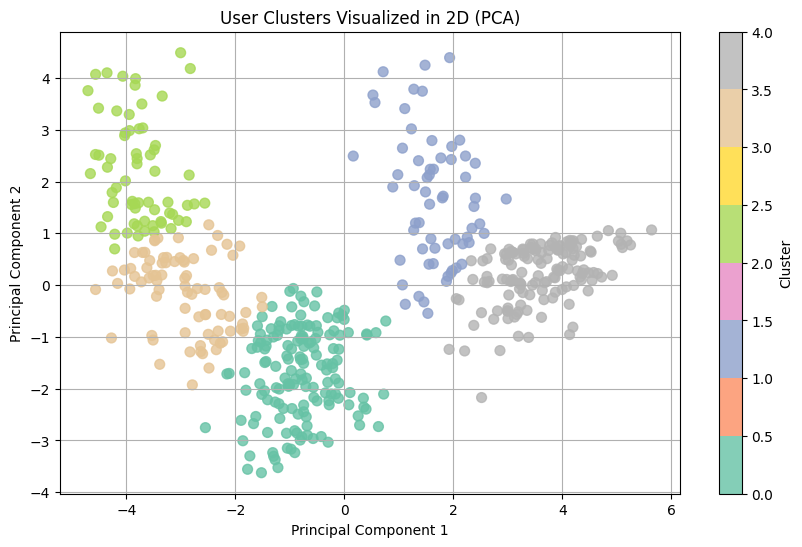

In [87]:
sil_score = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set2', alpha=0.8, s=50)
plt.title('User Clusters Visualized in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


## Checking the distribution

## loding the data

In [154]:
df = pd.read_csv("cafe_reviews.csv")

## checking for the distribution


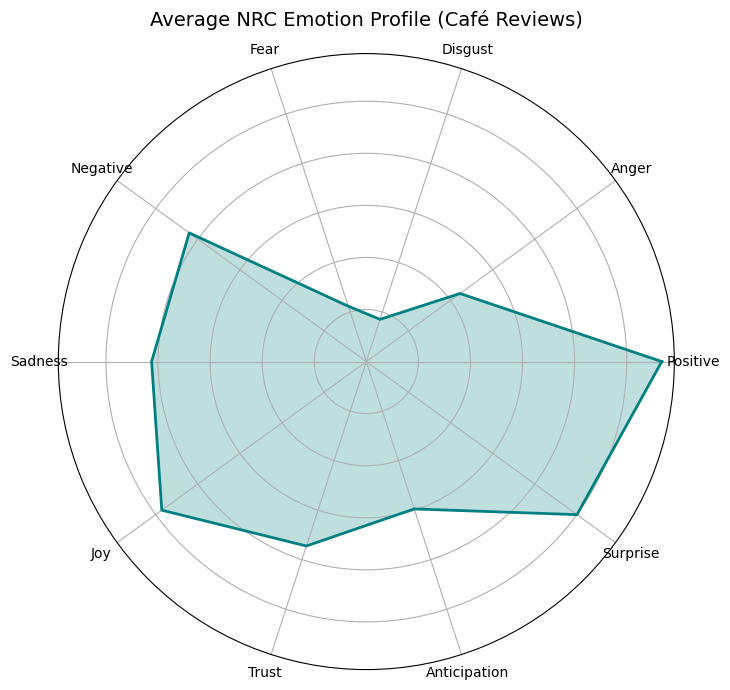

In [155]:
nrc_emotions = ['nrc_positive', 'nrc_anger', 'nrc_disgust', 'nrc_fear',
                'nrc_negative', 'nrc_sadness', 'nrc_joy', 'nrc_trust',
                'nrc_anticipation', 'nrc_surprise']

avg_emotions = df[nrc_emotions].mean()

labels = [e.replace("nrc_", "").replace("_x", "").capitalize() for e in nrc_emotions]
values = avg_emotions.values.tolist()
values += values[:1]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='teal', linewidth=2)
ax.fill(angles, values, color='teal', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.set_title("Average NRC Emotion Profile (Café Reviews)", size=14, pad=20)

plt.show()

## Inisghts
#### Positive Emotions Dominate leads with the highest score, followed by surprise and joy indicating a positive sentiment trend.
